# Regresion Líneal sencilla con Stats

## Relaciones lineales

Armemos una relación entre Celsius y Farenheit

In [61]:
C = 100
F = C * 9/5 + 32
print(f"{C}°C son {F}°F")

100°C son 212.0°F


Armemos una comprensión de lista con esta función para todas las temeperaturas del 0 al 100 de 10 en 10

In [62]:
conversiones = [(C,( C * 9/5 + 32)) for C in range(0, 101, 10)]

In [63]:
print(conversiones)

[(0, 32.0), (10, 50.0), (20, 68.0), (30, 86.0), (40, 104.0), (50, 122.0), (60, 140.0), (70, 158.0), (80, 176.0), (90, 194.0), (100, 212.0)]


Importa Pandas

In [64]:
import pandas as pd

Creamos un DataFrame con las listas

In [65]:
df = pd.DataFrame(conversiones)
df.columns = ['Celsius', 'Fahrenheit']

In [66]:
df

,Celsius,Fahrenheit
0,0,32.0
1,10,50.0
2,20,68.0
3,30,86.0
4,40,104.0
5,50,122.0
6,60,140.0
7,70,158.0
8,80,176.0
9,90,194.0


Arma una gráfica que muestre esta relación

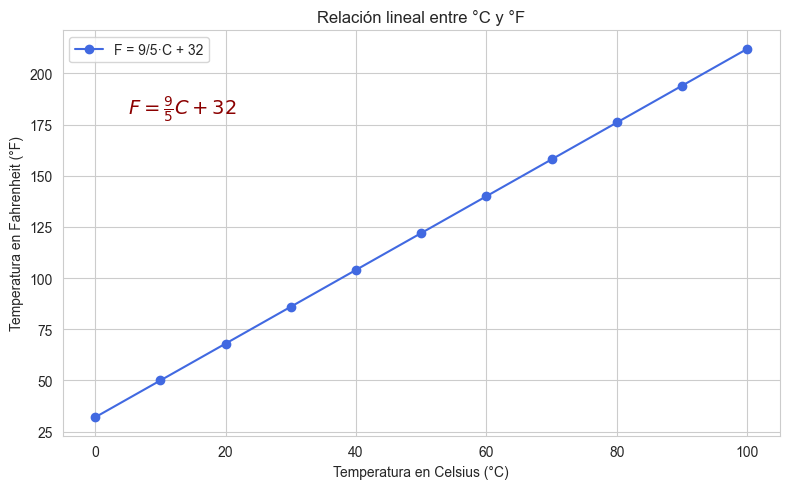

In [67]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(df['Celsius'], df['Fahrenheit'], marker='o', linestyle='-', color='royalblue', label='F = 9/5·C + 32')

plt.title('Relación lineal entre °C y °F')
plt.xlabel('Temperatura en Celsius (°C)')
plt.ylabel('Temperatura en Fahrenheit (°F)')

# Mostrar fórmula en estilo matemático
plt.text(5, 180, r'$F = \frac{9}{5}C + 32$', fontsize=14, color='darkred')

plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

Ponle etiquetas

y = mx + b

## Regresión lineal con King_county

Carga los datos de King county a un dataframe

In [68]:
df = pd.read_csv("kc_house_data.csv")

Veamos el Head

In [69]:
df.head()

,sqft,price
0,1180,221900.0
1,2570,538000.0
2,770,180000.0
3,1960,604000.0
4,1680,510000.0


Veamos el Tail

In [70]:
df.tail()

,sqft,price
21608,1530,360000.0
21609,2310,400000.0
21610,1020,402101.0
21611,1600,400000.0
21612,1020,325000.0


Vamos cambiando los titulos de columnas

In [71]:
df.rename(columns={
    'price': 'Precio',
    'sqft': 'Tamaño_m2',
    'bedrooms': 'Habitaciones'
}, inplace=True)


Ceca tu nuevo head

In [72]:
df.head()

,Tamaño_m2,Precio
0,1180,221900.0
1,2570,538000.0
2,770,180000.0
3,1960,604000.0
4,1680,510000.0


Importa stats de scipy

In [73]:
from scipy import stats

Arma un modelo de regresión lineal

In [74]:
x = df['Tamaño_m2']
y = df['Precio']

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)


Chea la pendiente

In [75]:
slope

np.float64(280.8066899295007)

Checa la intercepción

In [76]:
intercept

np.float64(-43867.60153385566)

PrecioVenta = 280.80*Areaft - 43,867.60

Vamos a predecir el precio de alguna casa

In [77]:
area = 2000
precio_estimado = 280.80 * area - 43867.60
print(f"Precio estimado: ${precio_estimado:,.2f}")

Precio estimado: $517,732.40


Compara con la realidad

In [78]:
df[df['Tamaño_m2'] == 2000]

print(df[(df['Tamaño_m2'] >= 1980) & (df['Tamaño_m2'] <= 2020)][['Tamaño_m2', 'Precio']])


       Tamaño_m2    Precio
53          1980  585000.0
82          2020  355000.0
90          1980  243500.0
101         1980  555000.0
131         2010  660500.0
...          ...       ...
21340       2000  417000.0
21400       1980  317750.0
21438       1980  435000.0
21439       2010  639000.0
21545       1980  405000.0

[497 rows x 2 columns]


### Hacer la gráfica

Importa Seaborn

In [79]:
import seaborn as sns

Pon el estilo como Whitegrid

In [80]:
sns.set_style("whitegrid")

Arma una regplot de sns

C:\Users\Mimos\AppData\Local\Temp\ipykernel_15540\1876393560.py:7: UserWarning: Glyph 128181 (\N{BANKNOTE WITH DOLLAR SIGN}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Mimos\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128181 (\N{BANKNOTE WITH DOLLAR SIGN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


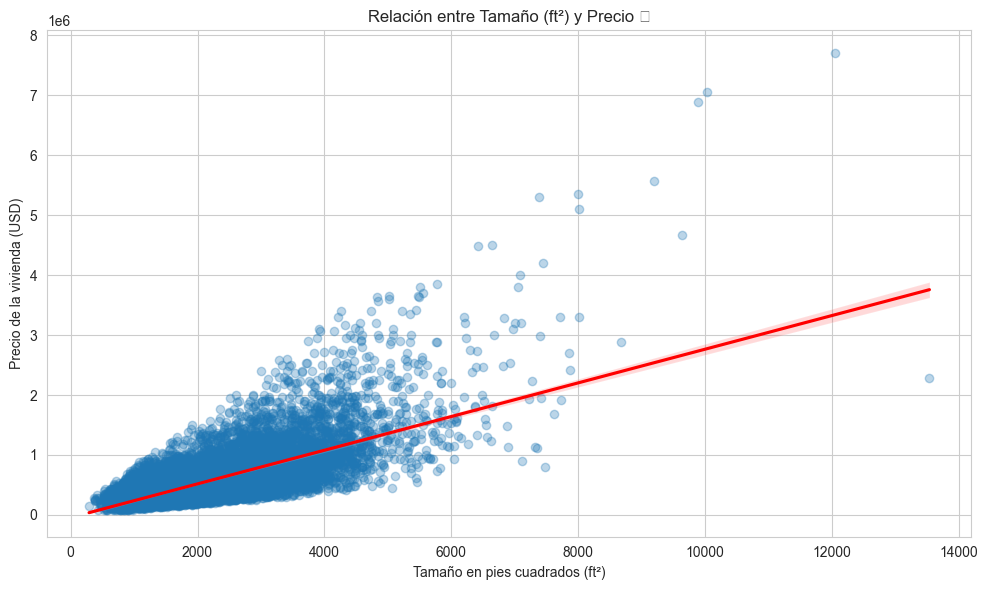

In [81]:
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='Tamaño_m2', y='Precio', scatter_kws={'alpha':0.3}, line_kws={'color':'red'})

plt.title("Relación entre Tamaño (ft²) y Precio 💵")
plt.xlabel("Tamaño en pies cuadrados (ft²)")
plt.ylabel("Precio de la vivienda (USD)")
plt.tight_layout()
plt.show()